In [1]:
%store -r freq

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy import interpolate

In [10]:
data     = scipy.io.loadmat('/home/ghoshsonia/rfi_RRI/Data_18March_wMFP.mat')
data     = data['Data2']/1e3  # Kelvin units
fr       = np.loadtxt('/home/ghoshsonia/rfi_RRI/PRATUSH-master/atlas/freq_saras.txt') #Frequency in MHz
signal   = interpolate.interp1d(fr, data)

In [19]:
#freq_custom = np.linspace(50, 200, 1001) #Use the frequencies you want for the signals
T21_full = signal(freq) #This generates the atlas (nsignal, nfrequency)

#For a sample signal, you can go for index 100
VANILLA_model = T21_full[100]

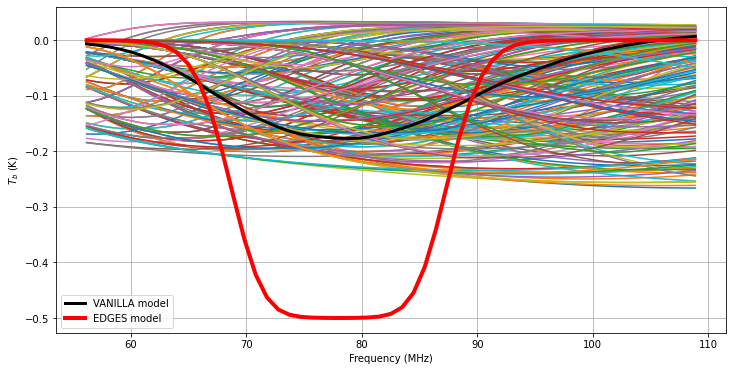

In [24]:
plt.figure(figsize=(12,6))
plt.plot(freq, T21_full.T)
plt.plot(freq, VANILLA_model, lw=3.0, color='k', label='VANILLA model')
plt.plot(freq,T_21(freq), lw=4.0, color='r', label='EDGES model')
plt.grid()
plt.legend()
plt.xlabel("Frequency (MHz)")
plt.ylabel(r"$T_b$ (K)")
plt.show()

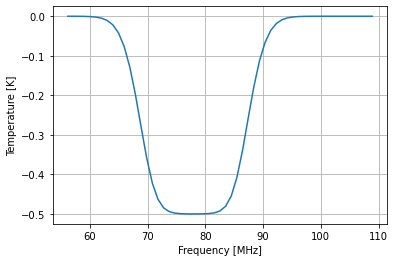

In [18]:
####  generate Bowman Dip
A = 0.50
nu0 = 78.0
w = 19.0
tau = 7.0
T_21 = lambda nu: -A*(1-np.exp(-tau*np.exp((4*(nu-nu0)**2/w**2)*np.log((-1/tau)* \
np.log((1+np.exp(-tau))/2)))))/(1-np.exp(-tau))
### nu is in MHz
## replace variable frequency below with the frequency array you are using

frequency = np.arange(55,110,1)
EDGES_signal = T_21(freq)
plt.plot(freq,T_21(freq))
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.grid()
plt.show()